In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
sanjuan_dataset = pd.read_csv("../../dengueData/SanJuan/san_juan_training_data.csv")
print(sanjuan_dataset.head())
print("Number of observations: ", len(sanjuan_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  1990/1991            1      1990-04-30            0            0   
1  1990/1991            2      1990-05-07            0            0   
2  1990/1991            3      1990-05-14            0            0   
3  1990/1991            4      1990-05-21            0            0   
4  1990/1991            5      1990-05-28            0            0   

   denv3_cases  denv4_cases  other_positive_cases  additional_cases  \
0            0            0                     4                 0   
1            0            0                     5                 0   
2            0            0                     4                 0   
3            0            0                     3                 0   
4            0            0                     6                 0   

   total_cases  
0            4  
1            5  
2            4  
3            3  
4            6  
Number of observations:  988


In [32]:
sanjuan_cases = sanjuan_dataset["total_cases"].values
print(sanjuan_cases.shape)

(988,)


In [33]:
def series_to_timeseries_window(data, windowSize):
    x = []
    y = []
    future_steps = 3
    for i in range(len(data)-windowSize-future_steps):
        x_observation = []
        y_observation = [data[i+windowSize+future_steps]]
        for j in range(windowSize):
            x_observation.append(data[i+j])
        x.append(x_observation)
        y.append(y_observation)
    return np.array(x), np.array(y)

In [34]:
#Test that the method works
test_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

tX, ty = series_to_timeseries_window(test_data, 4)

print(tX)
print(ty)

[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]]
[[ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]]


In [46]:
split_index = int(len(sanjuan_cases)* 0.7)
reframed_X, reframed_y = series_to_timeseries_window(sanjuan_cases, 4)

train_X = reframed_X[:split_index]
train_y = reframed_y[:split_index]

test_X = reframed_X[split_index:]
test_y = reframed_y[split_index:]

train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])

test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

In [47]:
print(train_X.shape)
print(train_y.shape)

print(test_X.shape)
print(test_y.shape)

# print(test_X[-10:])
# print(test_y[-10:])
# print(iquitos_cases[-10:])

(691, 1, 4)
(691, 1)
(290, 1, 4)
(290, 1)


## Train model

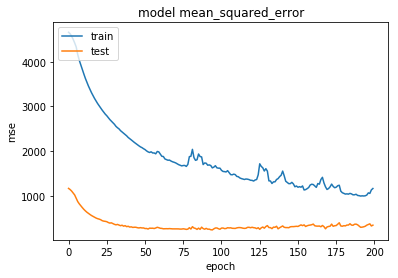

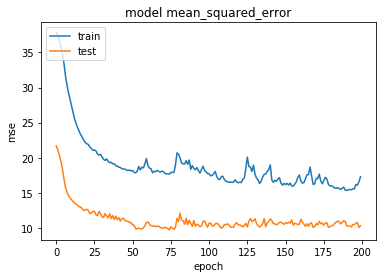

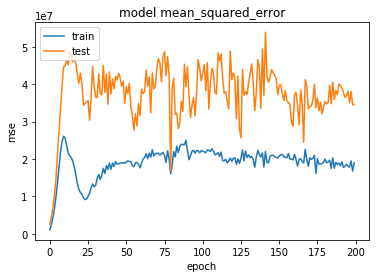

In [106]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(16, input_shape=(1,4), return_sequences=False))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae", "mape"])

history = model.fit(train_X, train_y, epochs=200, batch_size=32, verbose=0, shuffle=False, validation_data=(test_X, test_y))

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_squared_error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model mean_squared_error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

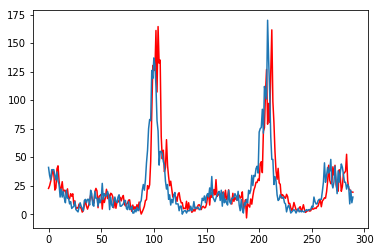

In [107]:
predictions = model.predict(test_X)
plt.plot(predictions, color='red')

plt.plot(test_y)
plt.show()

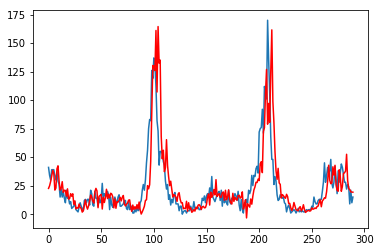

342.65280121755427


In [108]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_y, predictions)

plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()
print(error)

In [11]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_y, predictions)
print(mae)

10.692329090114297


In [12]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps))) * 100

mape = mean_absolute_percentage_error(test_y, predictions)
print(mape)

9327047987013636.0
